# Acrobot

In [1]:
from utils import load_data
from utils import acrobot_visualize_point, cartpole_visualize_point
import numpy as np
import pickle
import re
import click
from systems.acrobot import Acrobot
from matplotlib import pyplot as plt

In [2]:
from utils import load_data
env_id = 0
system = 'acrobot_obs'
traj_id = 0
path_dict = load_data(system, env_id, traj_id)
path_dict['path']/np.array([np.pi, np.pi, 6, 6]),path_dict['start_goal']/np.array([np.pi, np.pi, 6, 6])

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [-0.02732391,  0.06277177, -0.02628735,  0.0726605 ],
        [ 0.13854462, -0.276965  ,  0.16447386, -0.40906219],
        [-0.27266415,  0.84156032,  0.37800126,  0.11047539],
        [ 0.07427513,  0.79774502,  0.52251744, -0.16877733],
        [ 0.3634988 ,  0.63976571, -0.0231225 , -0.01597952],
        [-0.59476963, -0.23865927, -0.06402698,  0.49391121]]),
 array([[0.        , 0.        , 0.        , 0.        ],
        [1.21833183, 0.14274027, 0.        , 0.        ]]))

In [3]:
setup = 'default_norm'
# setup = 'norm_nodiff_noaug_20step2e-2'

data_fn = 'acrobot_obs_path_data.npy'
gt_fn = 'acrobot_obs_gt.npy'

data = np.load('{}/{}'.format(setup, data_fn))[:, 1:]
gt = np.load('{}/{}'.format(setup, gt_fn))
c2g = np.load('{}/acrobot_obs_cost_to_go.npy'.format(setup))
csf= np.load('{}/acrobot_obs_cost_so_far.npy'.format(setup))
c = np.load('{}/acrobot_obs_cost.npy'.format(setup))
start_id = 0
end_id = 18
# start_id = 9
# end_id = 18
data[start_id:end_id, :4], gt[start_id:end_id]

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.07836297, -0.17056428,  0.18107719, -0.41303746],
        [ 0.00786703, -0.1493748 , -0.26408768,  0.42104782],
        [-0.28368059,  0.47980372, -0.06044505,  0.41753025],
        [ 0.33609031, -0.84215921, -0.64869047,  0.09831128],
        [-0.37911599, -0.458542  , -0.33615473,  0.28004222],
        [-0.44130319, -0.40049396, -0.17900291,  0.20693734],
        [ 0.51785798,  0.78154969,  0.59162705, -0.50202684],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.07836297, -0.17056428,  0.18107719, -0.41303746],
        [ 0.00786703, -0.1493748 , -0.26408768,  0.42104782],
        [-0.28368059,  0.47980372, -0.06044505,  0.41753025],
        [ 0.33609031, -0.84215921, -0.64869047,  0.09831128],
        [-0.37911599, -0.458542  , -0.33615473,  0.28004222],
        [-0.44327551, -0.41556337,  0.07031953, -0.13069033],
        [ 0.67573328,  0.4155318 ,  0.25019954, -0.49337894],
        

In [4]:
c2g[start_id:end_id],csf[start_id:end_id],c[start_id:end_id]

(array([5.12, 4.74, 4.12, 3.56, 2.02, 1.46, 1.34, 0.42, 5.16, 4.78, 4.16,
        3.6 , 2.06, 1.5 , 1.28, 0.24, 5.24, 4.86]),
 array([0.  , 0.38, 1.  , 1.56, 3.1 , 3.66, 3.78, 4.7 , 0.  , 0.38, 1.  ,
        1.56, 3.1 , 3.66, 3.88, 4.92, 0.  , 0.38]),
 array([0.38, 0.62, 0.56, 1.54, 0.56, 0.12, 0.92, 0.42, 0.38, 0.62, 0.56,
        1.54, 0.56, 0.22, 1.04, 0.24, 0.38, 0.62]))

<IPython.core.display.Javascript object>


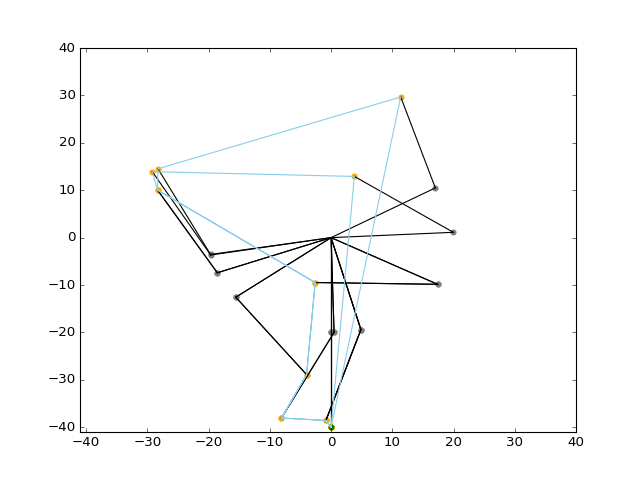

(-41, 40)

In [6]:
%matplotlib notebook
datas = data[start_id:end_id, :4]*np.array([np.pi, np.pi, 6, 6])
gts = gt[start_id:end_id]*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [7]:
gt.std(axis=0)

array([0.42545894, 0.53090079, 0.32452242, 0.38460388])

In [8]:
data[:,].std(axis=0)

array([0.34413544, 0.51726373, 0.31461976, 0.35230726, 0.77537811,
       0.34163483, 0.        , 0.        ])

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


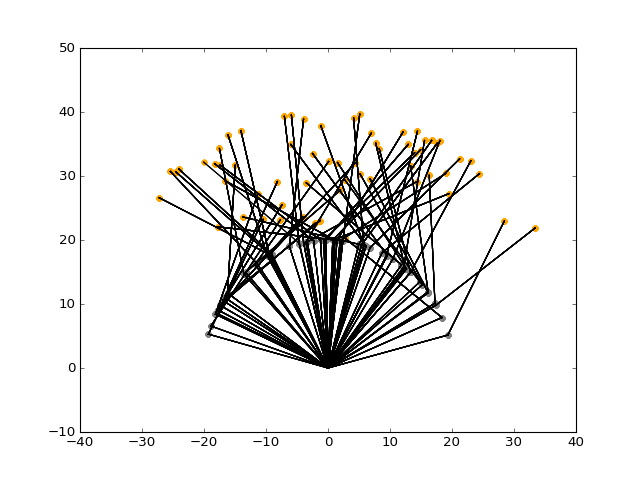

In [10]:
%matplotlib 

d = data[:500, 4:]
endeff = []
node1 = []
for i in range(d.shape[0]):
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(d[i, :4] * np.array([np.pi, np.pi, 6,6]))#gts[i, :]
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')


<IPython.core.display.Javascript object>


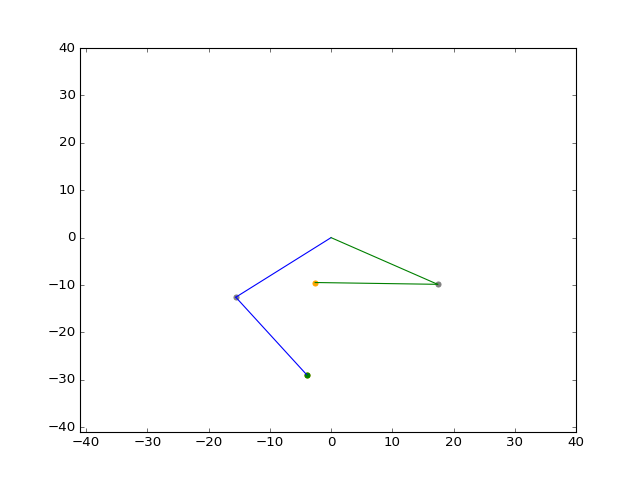

(-41, 40)

In [12]:
%matplotlib notebook
node_id = 11

datas = data[node_id:node_id+1, :4]*np.array([np.pi, np.pi, 6, 6])
gts = gt[node_id:node_id+1]*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='blue')
    plt.plot([ex1, ex2], [ey1, ey2], color='blue')
    
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(gts[i, :])#
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='green')
    plt.plot([ex1, ex2], [ey1, ey2], color='green')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [8]:
data[node_id:node_id+1, :4],gt[node_id:node_id+1]

(array([[0., 0., 0., 0.]]),
 array([[ 0.07836297, -0.17056428,  0.18107719, -0.41303746]]))

# Cartpole

In [3]:
from utils import load_data
env_id = 0
system = 'cartpole_obs'
traj_id = 0
path_dict = load_data(system, env_id, traj_id)
path_dict['path']
raw_path = path_dict['path']

path_dict['path']/np.array([30, 40, np.pi, 2]),path_dict['start_goal']/np.array([30, 40, np.pi, 2]), path_dict['cost']

(array([[-0.78679571,  0.        , -0.72683077,  0.        ],
        [-0.78387237,  0.03897888, -0.71674595,  0.2818265 ],
        [-0.77617504,  0.08173258, -0.69134889,  0.55167295],
        [-0.74571625,  0.08188605, -0.56311404,  0.92482594],
        [-0.74271941, -0.07093744, -0.37011835,  1.        ],
        [-0.74747806,  0.05897862, -0.15469211,  0.80123901],
        [-0.6871426 ,  0.23795265, -0.07785329, -0.08244579],
        [-0.67181024,  0.20297833, -0.07701181,  0.14192407],
        [-0.54852391,  0.3912504 , -0.14717923, -0.80968939],
        [-0.36001536,  0.49820154, -0.33656012, -0.96946641],
        [-0.1887574 ,  0.59163989, -0.47293082, -0.79903122],
        [-0.04287699,  0.52554769, -0.55484169, -0.52848801],
        [ 0.15127235,  0.47268129, -0.62207433, -0.20569299],
        [ 0.32594997,  0.36649397, -0.6468775 , -0.05298587],
        [ 0.44465716,  0.26873868, -0.64703749,  0.05185427],
        [ 0.49421867,  0.20703437, -0.63975975,  0.0969726 ],
        

In [4]:
len(path_dict['path'])

21

<IPython.core.display.Javascript object>


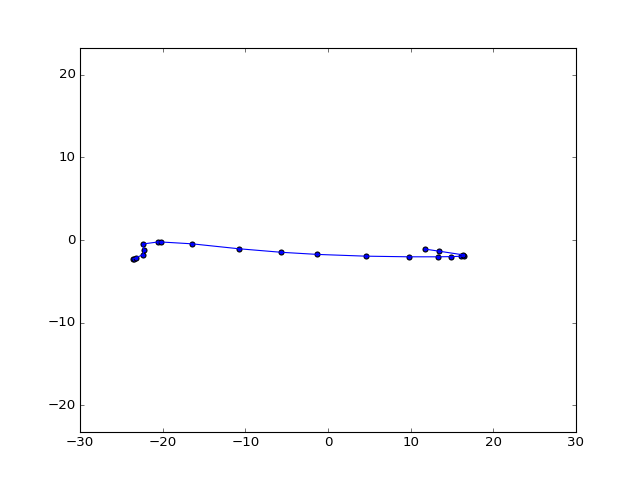

(-3.141592653589793, 3.141592653589793)

In [5]:
%matplotlib notebook
plt.plot(raw_path[:, 0], raw_path[:, 2])
plt.scatter(raw_path[:, 0], raw_path[:, 2])

plt.axis('equal')
plt.xlim(-30, 30)
plt.ylim(-np.pi, np.pi)


<IPython.core.display.Javascript object>


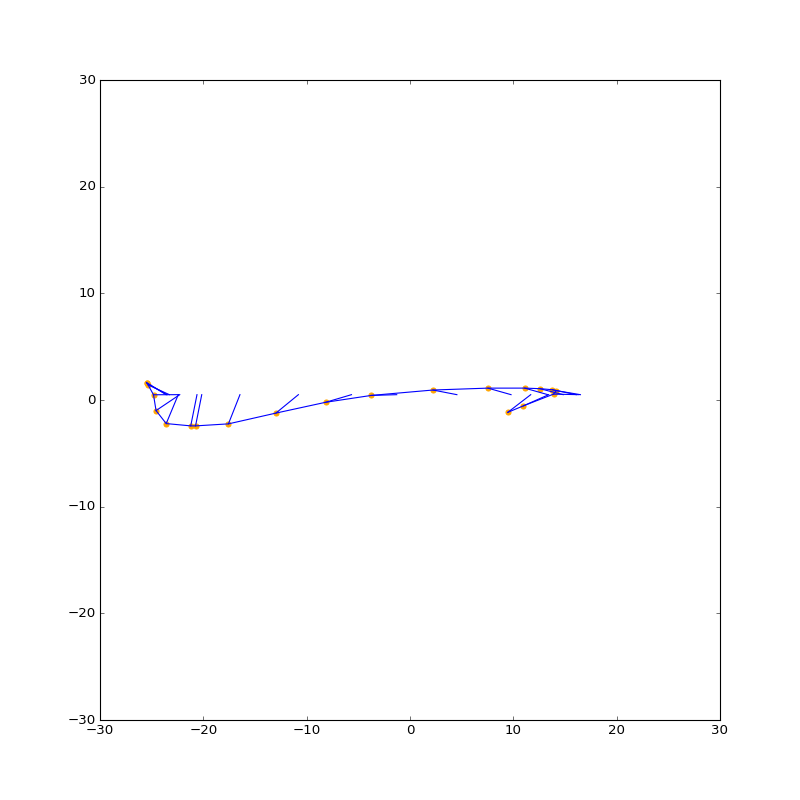

(-30, 30)

In [8]:
%matplotlib notebook
cartpole_visualize_point(path_dict['path'][0])    

fig, ax = plt.subplots(figsize=(10,10))

ends_x, ends_y = [], []
for state in path_dict['path']:
#     visualize_cartpole(ax, state)
    x1, y1, x2, y2 = cartpole_visualize_point(state)
    ax.plot([x1, x2],[y1, y2], 'blue')
    ax.scatter(x2, y2, color='orange')
    ends_x.append(x2)
    ends_y.append(y2)
ax.plot(ends_x, ends_y)
plt.xlim(-30, 30)
plt.ylim(-30, 30)

In [16]:
setup = 'default_norm'

data_fn = 'cartpole_obs_path_data.npy'
gt_fn = 'cartpole_obs_gt.npy'

data = np.load('data/{}/{}'.format(setup, data_fn))[:, 1:]
gt = np.load('data/{}/{}'.format(setup, gt_fn))
c2g = np.load('data/{}/cartpole_obs_cost_to_go.npy'.format(setup))
csf= np.load('data/{}/cartpole_obs_cost_so_far.npy'.format(setup))
c = np.load('data/{}/cartpole_obs_cost.npy'.format(setup))

data_obs_fn = 'cartpole_obs_data_with_obs'
data_obs = np.load('data/{}/{}'.format(setup, data_fn))[:, 1:]
c2g_obs = np.load('data/{}/cartpole_obs_c2g_with_obs.npy'.format(setup))

start_id = 0
end_id = 70
# start_id = 9
# end_id = 18
# data[start_id:end_id, :4], gt[start_id:end_id],c2g[start_id:end_id]

data_obs[start_id:end_id, :4], c2g_obs[start_id:end_id]

(array([[-0.78679571,  0.        , -0.72683077,  0.        ],
        [-0.78387237,  0.03897888, -0.71674595,  0.2818265 ],
        [-0.77617504,  0.08173258, -0.69134889,  0.55167295],
        [-0.74571625,  0.08188605, -0.56311404,  0.92482594],
        [-0.74271941, -0.07093744, -0.37011835,  1.        ],
        [-0.74747806,  0.05897862, -0.15469211,  0.80123901],
        [-0.6871426 ,  0.23795265, -0.07785329, -0.08244579],
        [-0.67181024,  0.20297833, -0.07701181,  0.14192407],
        [-0.54852391,  0.3912504 , -0.14717923, -0.80968939],
        [-0.36001536,  0.49820154, -0.33656012, -0.96946641],
        [-0.1887574 ,  0.59163989, -0.47293082, -0.79903122],
        [-0.04287699,  0.52554769, -0.55484169, -0.52848801],
        [ 0.15127235,  0.47268129, -0.62207433, -0.20569299],
        [ 0.32594997,  0.36649397, -0.6468775 , -0.05298587],
        [ 0.44465716,  0.26873868, -0.64703749,  0.05185427],
        [ 0.49421867,  0.20703437, -0.63975975,  0.0969726 ],
        

In [11]:
data[start_id:end_id, :4]#, gt[start_id:end_id, :]

array([[-0.78679571,  0.        , -0.72683077,  0.        ],
       [-0.78387237,  0.03897888, -0.71674595,  0.2818265 ],
       [-0.77617504,  0.08173258, -0.69134889,  0.55167295],
       [-0.74571625,  0.08188605, -0.56311404,  0.92482594],
       [-0.74271941, -0.07093744, -0.37011835,  1.        ],
       [-0.74747806,  0.05897862, -0.15469211,  0.80123901],
       [-0.6871426 ,  0.23795265, -0.07785329, -0.08244579],
       [-0.67181024,  0.20297833, -0.07701181,  0.14192407],
       [-0.54852391,  0.3912504 , -0.14717923, -0.80968939],
       [-0.36001536,  0.49820154, -0.33656012, -0.96946641],
       [-0.1887574 ,  0.59163989, -0.47293082, -0.79903122],
       [-0.04287699,  0.52554769, -0.55484169, -0.52848801],
       [ 0.15127235,  0.47268129, -0.62207433, -0.20569299],
       [ 0.32594997,  0.36649397, -0.6468775 , -0.05298587],
       [ 0.44465716,  0.26873868, -0.64703749,  0.05185427],
       [ 0.49421867,  0.20703437, -0.63975975,  0.0969726 ],
       [ 0.53632042,  0.

<IPython.core.display.Javascript object>


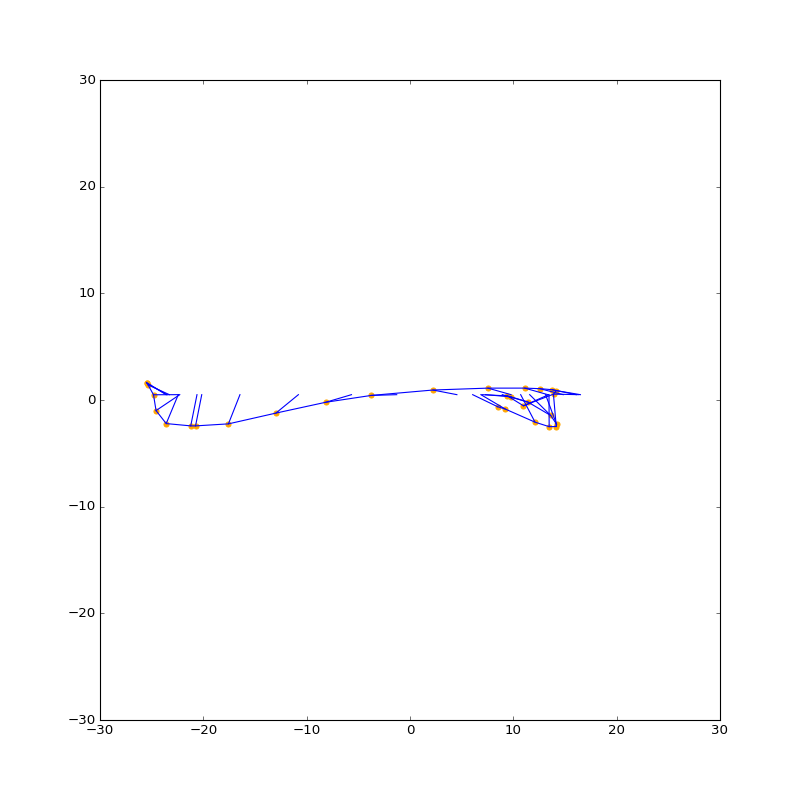

(-30, 30)

In [13]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10,10))

ends_x, ends_y = [], []
path = data[start_id:end_id, :4]*np.array([30, 40, np.pi, 2])
for state in path:
#     visualize_cartpole(ax, state)
    x1, y1, x2, y2 = cartpole_visualize_point(state)
    ax.plot([x1, x2],[y1, y2], 'blue')
    ax.scatter(x2, y2, color='orange')
    ends_x.append(x2)
    ends_y.append(y2)
ax.plot(ends_x, ends_y)
plt.xlim(-30, 30)
plt.ylim(-30, 30)

In [43]:
setup = 'default_norm_subsample0.5'
data_fn = 'cartpole_obs_path_data.npy'
gt_fn = 'cartpole_obs_gt.npy'

data = np.load('{}/{}'.format(setup, data_fn))[:, 1:]
gt = np.load('{}/{}'.format(setup, gt_fn))
c2g = np.load('{}/cartpole_obs_cost_to_go.npy'.format(setup))
csf= np.load('{}/cartpole_obs_cost_so_far.npy'.format(setup))
c = np.load('{}/cartpole_obs_cost.npy'.format(setup))
start_id = 0
end_id = 10
# start_id = 9
# end_id = 18
data[start_id:end_id, :4]#, gt[start_id:end_id],c2g[start_id:end_id]
# data[:, :4] *= np.array([30, 40, np.pi, 2])
# c

array([[-0.34084244,  0.        ,  0.88292494,  0.        ],
       [-0.37992239,  0.02119176,  0.68167714, -0.57268767],
       [-0.24490614,  0.05312192,  0.28550204, -0.98120737],
       [-0.20714976,  0.14229946, -0.11088849, -1.        ],
       [-0.14542158,  0.16930575, -0.28280193, -0.68656696],
       [ 0.16877648,  0.48188364, -0.51988162, -0.07528201],
       [ 0.48636242,  0.1053381 , -0.27503885,  1.        ],
       [-0.43746018,  0.        ,  0.61695389,  0.        ],
       [-0.32737065,  0.28027161,  0.53870283, -0.43181335],
       [-0.2002583 , -0.08026658,  0.1169573 , -0.39747769]])

<IPython.core.display.Javascript object>


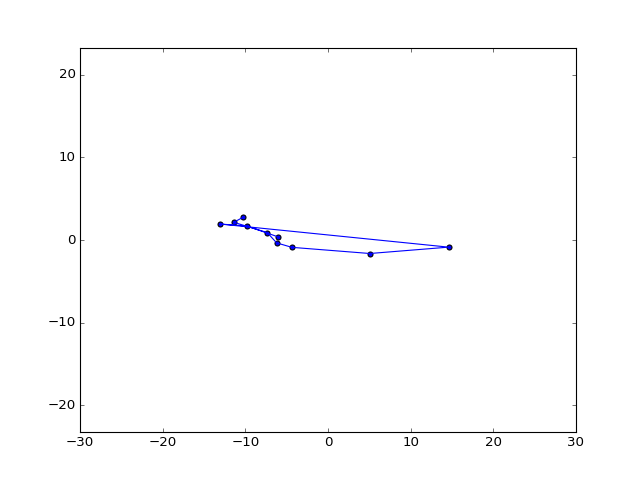

(-3.141592653589793, 3.141592653589793)

In [42]:
%matplotlib notebook
plt.plot(data[start_id:end_id, 0], data[start_id:end_id, 2])
plt.scatter(data[start_id:end_id, 0], data[start_id:end_id, 2])

plt.axis('equal')
plt.xlim(-30, 30)
plt.ylim(-np.pi, np.pi)


In [ ]:
#  def lineLine(self, x1, y1, x2, y2, x3, y3, x4, y4):
#     """
#     x1~y4 all in dim (N), which are 1-dim 
#     """
#     intersect = np.zeros(x1.shape[0]).astype(np.bool)
#     uA = np.array(((x4-x3)*(y1-y3) - (y4-y3)*(x1-x3)) / ((y4-y3)*(x2-x1) - (x4-x3)*(y2-y1)))
#     uB = np.array(((x2-x1)*(y1-y3) - (y2-y1)*(x1-x3)) / ((y4-y3)*(x2-x1) - (x4-x3)*(y2-y1)))
#     # if uA and uB are between 0-1, lines are colliding
#     #print(np.logical_and(np.logical_and(np.logical_and(uA >= 0, uA <= 1), uB >= 0), uB <= 1))
#     intersect[np.logical_and(np.logical_and(np.logical_and(uA >= 0, uA <= 1), uB >= 0), uB <= 1)] = True
#     return intersect


# def cartpole_validate(temp_state):
#     H = 0.5
#     pole_x1 = temp_state[0];
#     pole_y1 = H;
#     pole_x2 = temp_state[0] + L * sin(temp_state[2]);
#     pole_y2 = H + L * cos(temp_state[2]);

#     for i in range(len(obs_list)):
#         # check each line of the obstacle
#         x1 = obs_list[i][0] - self.obs_wh/2
#         y1 = obs_list[i][1] - self.obs_wh/2
#         x2 = obs_list[i][0] + self.obs_wh/2
#         y2 = obs_list[i][1] + self.obs_wh/2
#         intersect = np.logical_and(intersect, np.logical_not(self.lineLine(pole_x0, pole_y0, pole_x1, pole_y1, x1, y1, x2, y2)))
#         intersect = np.logical_and(intersect, np.logical_not(self.lineLine(pole_x1, pole_y1, pole_x2, pole_y2, x1, y1, x2, y2)))

<IPython.core.display.Javascript object>


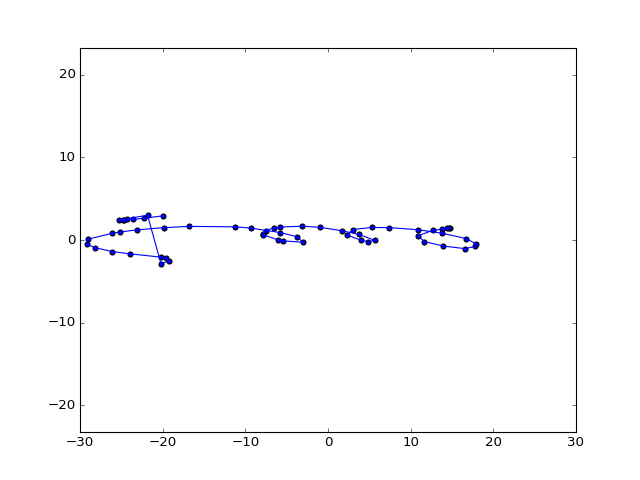

(-3.141592653589793, 3.141592653589793)

In [48]:
from utils import load_data
env_id = 0
system = 'cartpole_obs'
traj_id = 10
path_dict = load_data(system, env_id, traj_id)
path_dict['path']
raw_path = path_dict['path']

path_dict['path']/np.array([30, 40, np.pi, 2]),path_dict['start_goal']/np.array([30, 40, np.pi, 2]), path_dict['cost']

%matplotlib notebook
plt.plot(raw_path[:, 0], raw_path[:, 2])
plt.scatter(raw_path[:, 0], raw_path[:, 2])

plt.axis('equal')
plt.xlim(-30, 30)
plt.ylim(-np.pi, np.pi)
